In [20]:
import math
import numpy as np
import matplotlib.pyplot as plt

#FIX: take into account daylight savings time like in Example 11.1
#ignoring for now


#latitude = 46.77 #(in degrees)
#longitude = 117.2 #(in degrees)
latitude = 22.9068
longitude = 43.1729
standard_meridian = 120.0 #(in degrees)
day_of_year = 181 #equivalent to June 30
solar_noon = 12

#FIX: take into account fractions of hours as well (will need to convert to decimal hours, i.e., 10:45 becomes 10.75)
hour_of_day = 9.75



######

def sun_calcs(latitude, longitude, standard_meridian, day_of_year, solar_noon, hour_of_day):
    #LOCAL MERIDIAN IN DEGREES
    local_meridian = standard_meridian - longitude
    #FIX: take into account negative longitude
    #print("local meridian")
    #print(local_meridian)

    radians_per_degree = np.pi / 180

    radians_rotation_per_hour = 15 * radians_per_degree
    axial_tilt = 13.5 * radians_per_degree

    phi = latitude * radians_per_degree

    #from sun model code in HackMD: https://hackmd.io/98rj0V82RSyrDavaFxQbEg
    number_days_after_dec_solstice = day_of_year + 10

    omega = 360.0 * (number_days_after_dec_solstice / 365.0) * radians_per_degree
    delta = -axial_tilt * math.cos(omega)
    tau = (hour_of_day - solar_noon) * radians_rotation_per_hour

    #equation of time (in hours)
    J = day_of_year
    f = 279.575 + (0.9856 * J)

    f_rad = math.radians(f)
    part_1 = math.sin(f_rad) * -104.7

    f2 = f * 2
    f2_rad = math.radians(f2)
    part_2 = math.sin(f2_rad) * 596.2

    f3 = f * 3
    f3_rad = math.radians(f3)
    part_3 = math.sin(f3_rad) * 4.3

    f4 = f * 4
    f4_rad = math.radians(f4)
    part_4 = math.sin(f4_rad) * 12.7

    part_5 = math.cos(f_rad) * 429.3

    part_6 = math.cos(f2_rad) * 2.0

    part_7 = math.cos(f3_rad) * 19.3

    all_together = part_1 + part_2 + part_3 - part_4 - part_5 - part_6 + part_7

    equation_of_time = all_together / 3600
    #print("equation of time")
    #print(equation_of_time)

    longitudinal_correction = local_meridian / 15 #in hours
    #print("logitudinal correction")
    #print(longitudinal_correction)

    #time of solar noon (in hours)
    t0 = 12 - longitudinal_correction - equation_of_time
    #print("t0")
    #print(t0)

    #solar declination
    #should range from +23.45 degrees at summer solstice to -23.45 degrees at winter solstice
    times_j = 0.9856 * J
    inside_sine = 356.6 + times_j
    inside_sine_rad = math.radians(inside_sine)

    inner_sin = math.sin(math.radians(inside_sine))

    additions = 278.97 + times_j + (1.9165 * inner_sin)
    additions_rad = math.radians(additions)
    sin_of_adds = math.sin(additions_rad)
    times_const = 0.39785 * sin_of_adds

    final_in_rad = math.asin(times_const)

    solar_declination = math.degrees(final_in_rad)
    #print("solar declination")
    #print(solar_declination)

    #calculate zenith angle

    latitude_rad = math.radians(latitude)
    solar_declination_rad = math.radians(solar_declination)

    sin_1 = math.sin(latitude_rad)
    sin_2 = math.sin(solar_declination_rad)
    
    cos_1 = math.cos(latitude_rad)
    cos_2 = math.cos(solar_declination_rad)

    inside_cos = 15 * (hour_of_day - t0)
    inside_cos_rad = math.radians(inside_cos)

    cos_3 = math.cos(inside_cos_rad)

    before_arccos = (sin_1 * sin_2) + (cos_1 * cos_2 * cos_3)
    
    zenith_angle_rad = math.acos(before_arccos)

    zenith_angle = math.degrees(zenith_angle_rad)
    #print("zenith angle")
    #print(zenith_angle)

    ###FIX: using hard coded 96-->need to figure out where it is coming from
    ninety_six_rad = math.radians(96)
    first_cos = math.cos(ninety_six_rad)

    sins = math.sin(latitude_rad) * math.sin(solar_declination_rad)

    cosines = math.cos(latitude_rad) * math.cos(solar_declination_rad)

    equation = (first_cos - sins) / cosines
    
    #FIX: get error at certain latitudes/longitudes
    equation_acos = math.acos(equation)

    half_daylength = math.degrees(equation_acos)
    #print("half daylength")
    #print(half_daylength)

    time_sunrise = solar_noon - (half_daylength / 15)
    #print("time sunrise")
    #print(time_sunrise)

    hours = half_daylength * (1 / 15)
    #print("hours")
    #print(hours)

    first_twilight = t0 - hours
    #print("first twilight")
    #print(first_twilight)

    daylength = 2 * hours
    #print("daylength")
    #print(daylength)

    #FIX: including a +1 to take care of daylight savings time for now
    time_sunrise = first_twilight + longitudinal_correction + equation_of_time + 1
    #print("time sunrise")
    #print(time_sunrise)

    return {'zenith': zenith_angle, 'half_daylength': half_daylength, 'time_sunrise': time_sunrise, 'hours': hours,
           'first_twilight': first_twilight, 'daylength': daylength}


In [13]:
sun_calcs(latitude, longitude, standard_meridian, day_of_year, solar_noon, hour_of_day)

{'zenith': 38.6924118268674,
 'half_daylength': 107.74948351635341,
 'time_sunrise': 5.816701098909773,
 'hours': 7.183298901090227,
 'first_twilight': -0.24711249379361266,
 'daylength': 14.366597802180454}

In [3]:
latitude = 46.77 #(in degrees)
longitude = 117.2 #(in degrees)
standard_meridian = 120.0 #(in degrees)
day_of_year = 181 #equivalent to June 30
solar_noon = 12

#FIX: take into account fractions of hours as well (will need to convert to decimal hours, i.e., 10:45 becomes 10.75)
hour_of_day = 9.75

#FIX: figure out where this came from in old raytracer
kSOLAR_constant = 2600

In [17]:
import pandas as pd

In [18]:
vals = []
for doy in np.arange(365):
    vals.append(sun_calcs(latitude, longitude, standard_meridian, doy, solar_noon, hour_of_day))
df = pd.DataFrame(vals)

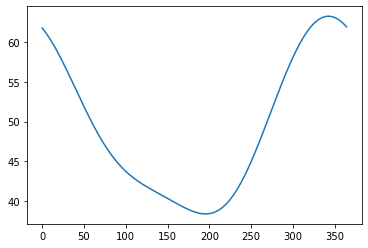

In [27]:
plt.plot("zenith", data=df)

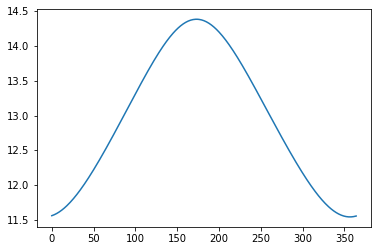

In [16]:
plt.plot(daylengths)

In [4]:
def calculation_PPFD(latitude, longitude, standard_meridian, day_of_year, solar_noon, hour_of_day):

    h = 15 * (hour_of_day - solar_noon) / 180 * np.pi
    print(h)

    derta = -23.45 * np.cos(2 * np.pi * (day_of_year + 10) / 365) / 180 * np.pi
    phi = latitude / 180 * np.pi
    #FIX: double check the arcsin calculations here
    thetas = np.arcsin((np.cos(h) * np.cos(derta) * np.cos(phi) + np.sin(derta) * np.sin(phi)))

    temp = (np.sin(derta) * np.cos(phi) - np.cos(h) * np.cos(derta) * np.sin(phi)) / np.cos(thetas)

    phys = 0

    if temp >= 1:
        phys = 0
    else:
        if temp < -1:
            temp = -1

    if h > 0:
        phys = -phys

    elevationAngle = thetas
    azimuthAngle = phys

    #Vect v
    #v.x = cos(elevationAngle) * cos(azimuthAngle)
    #v.y = cos(elevationAngle) * sin(azimuthAngle)
    #v.z = -sin(elevationAngle)

    ppfd = kSOLAR_constant * np.power(1.0, (1 / np.sin(elevationAngle))) * np.sin(elevationAngle)

    #PPFD_dir_light_per_triangle[current_pixel] = ppfd


In [31]:
1**(-3)

1.0

In [8]:
a = sun_calcs(latitude, longitude, standard_meridian, day_of_year, solar_noon, hour_of_day)
calculation_PPFD(latitude, longitude, standard_meridian, day_of_year, solar_noon, hour_of_day)

local meridian
2.799999999999997
equation of time
-0.05799307396328135
logitudinal correction
0.18666666666666648
t0
11.871326407296616
solar declination
23.22970127409204
zenith angle
34.695745258285385
half daylength
128.5108818439009
time sunrise
3.4326078770732735
hours
8.567392122926726
first twilight
3.3039342843698893
daylength
17.134784245853453
time sunrise
4.432607877073274
-0.5890486225480862


In [7]:
import numpy as np

In [9]:
a